In [2]:
import pandas as pd
import sweetviz as sv

#EDA using Autoviz
sweet_report = sv.analyze(pd.read_csv("Marketing.csv"))

#Saving results to HTML file
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Shape of your Data Set: (200, 7)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  7
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
  

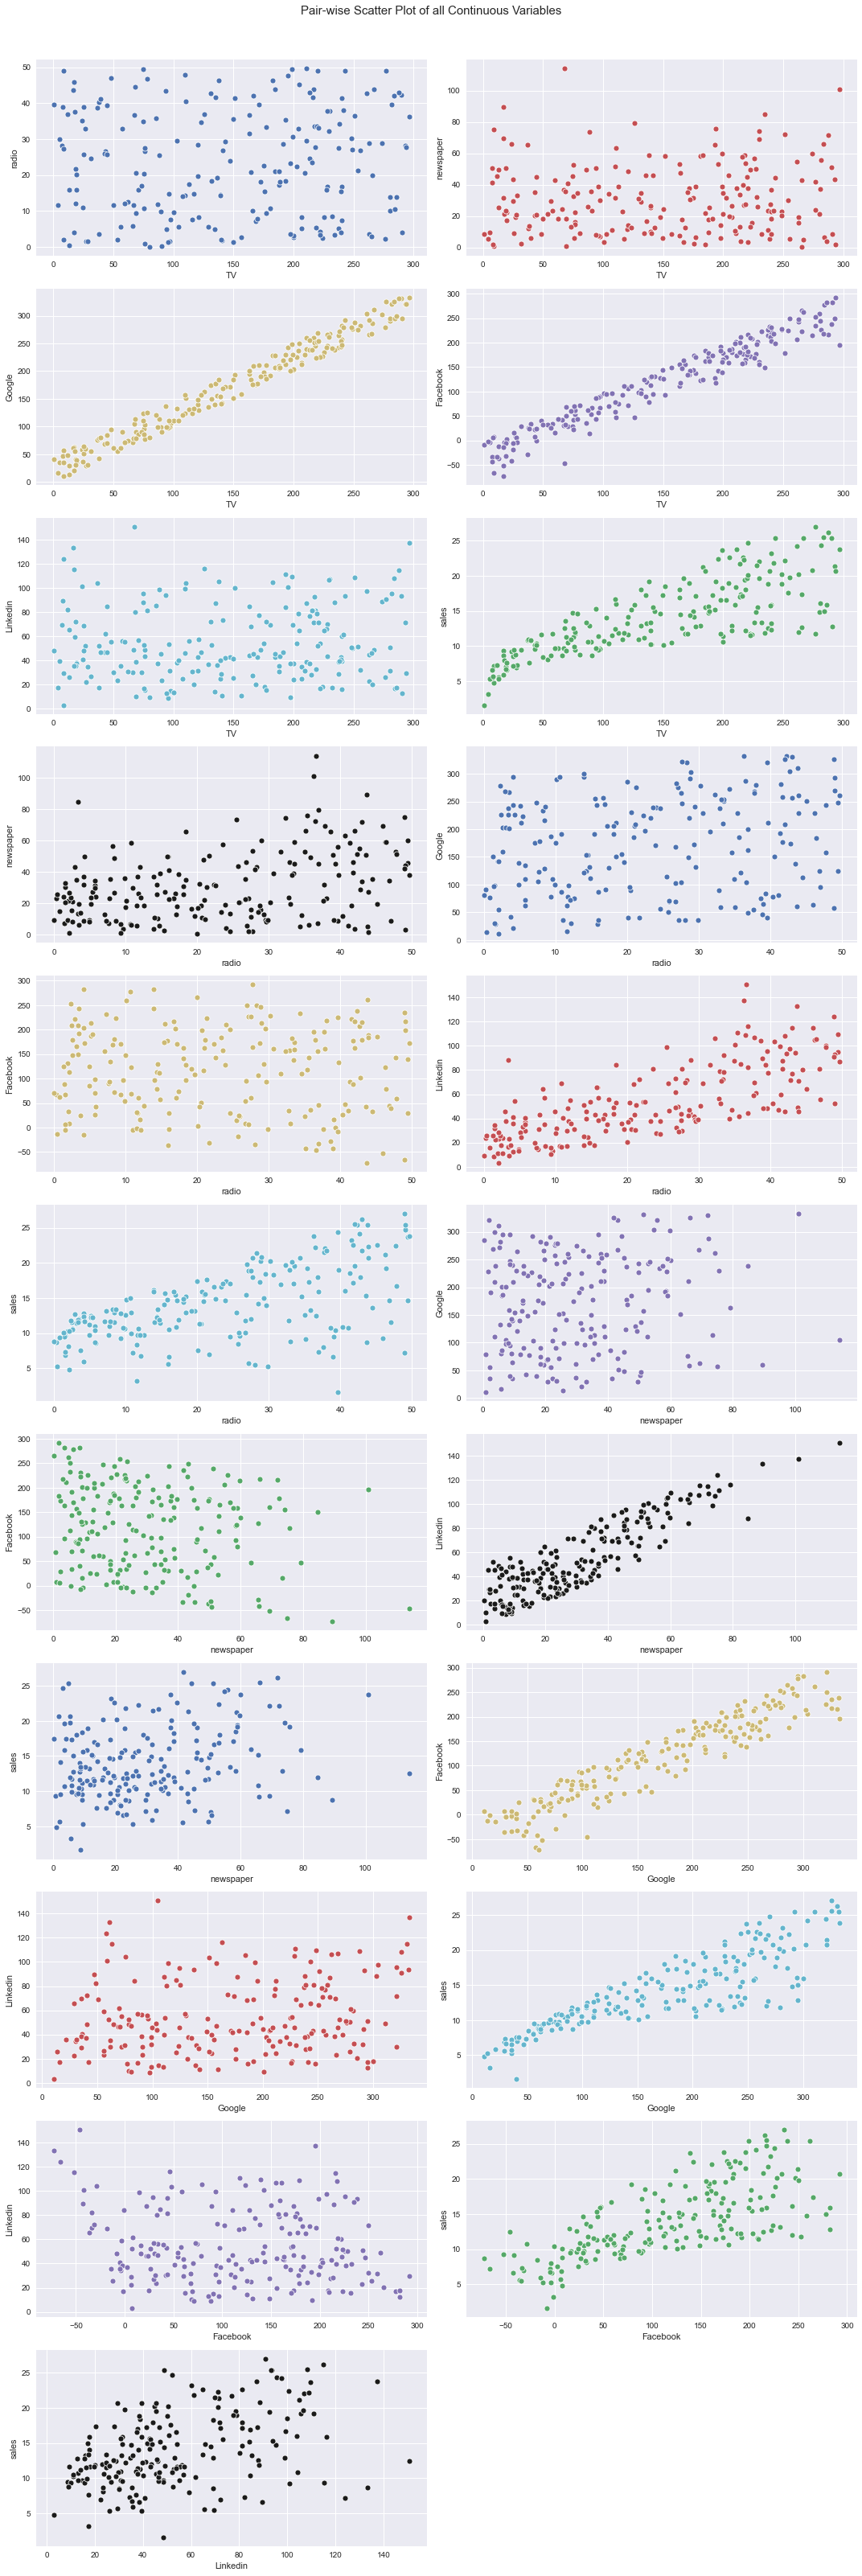

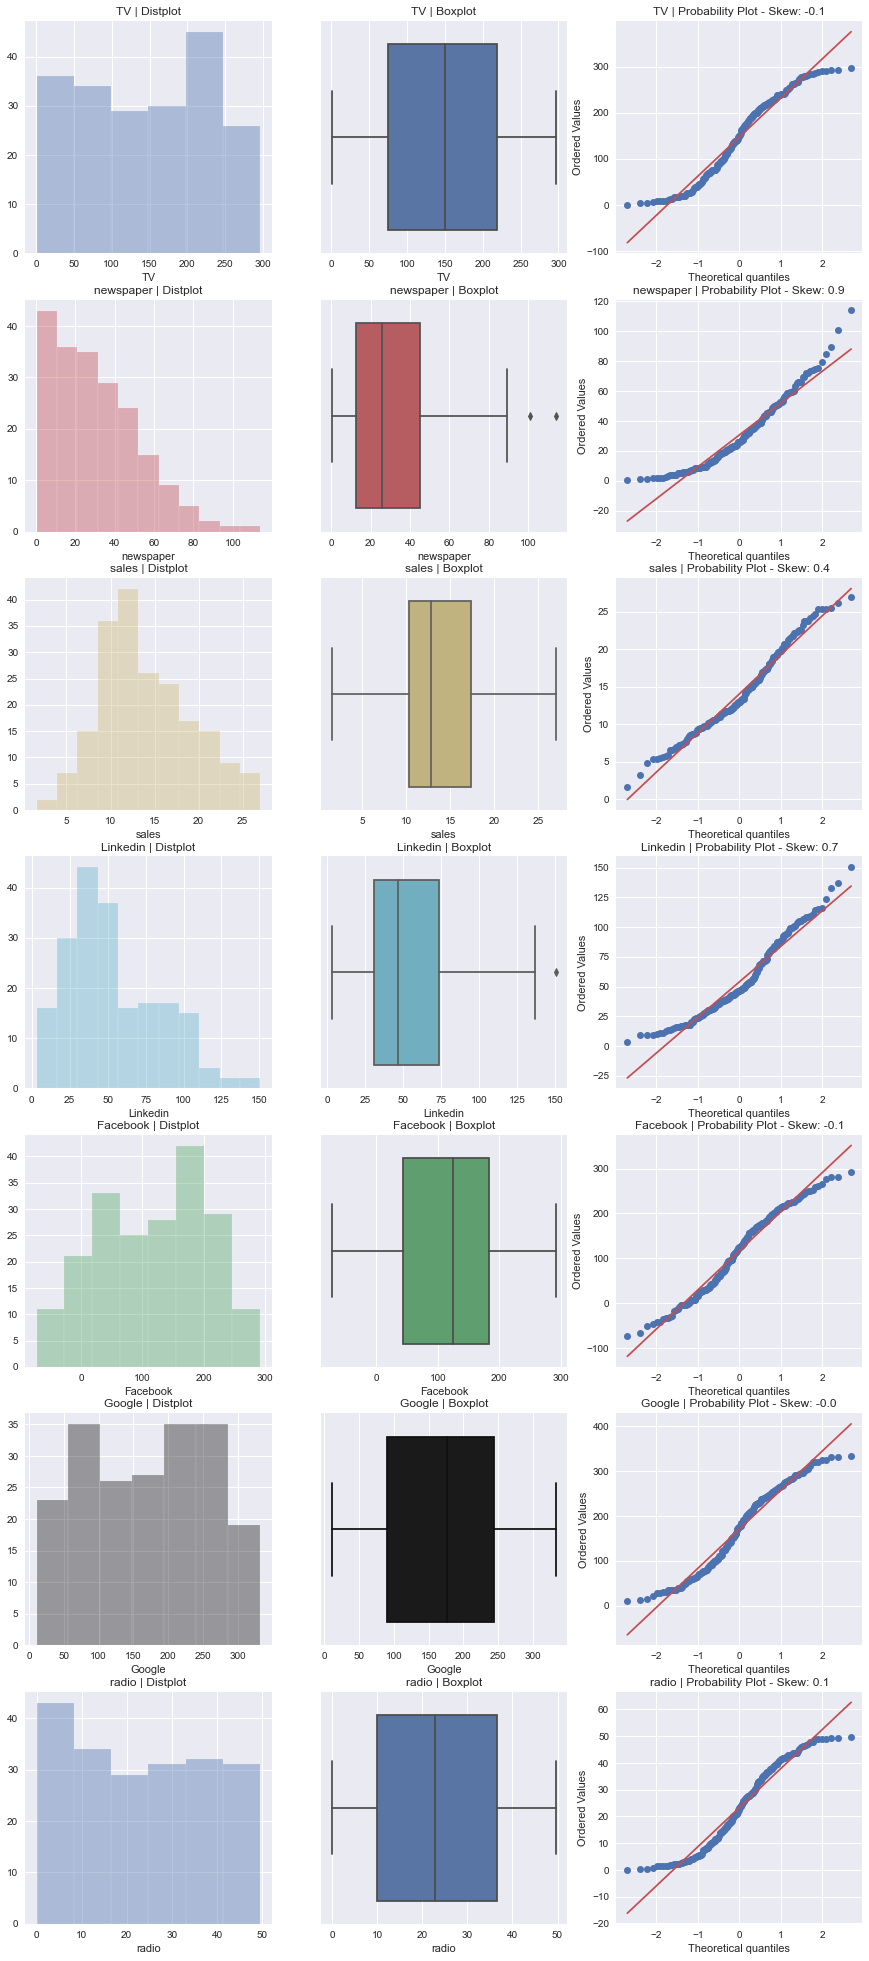

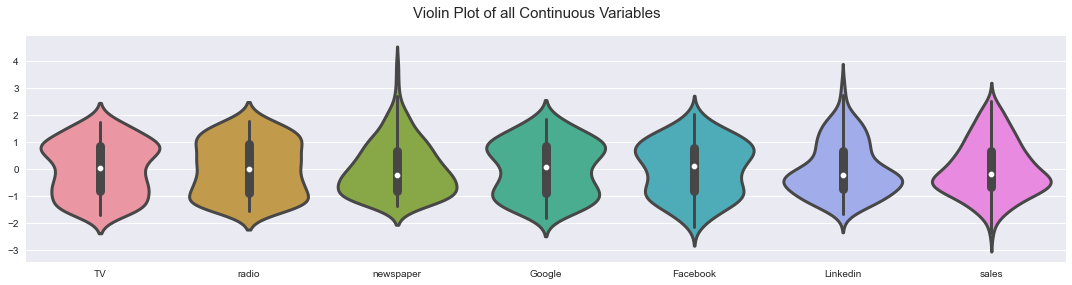

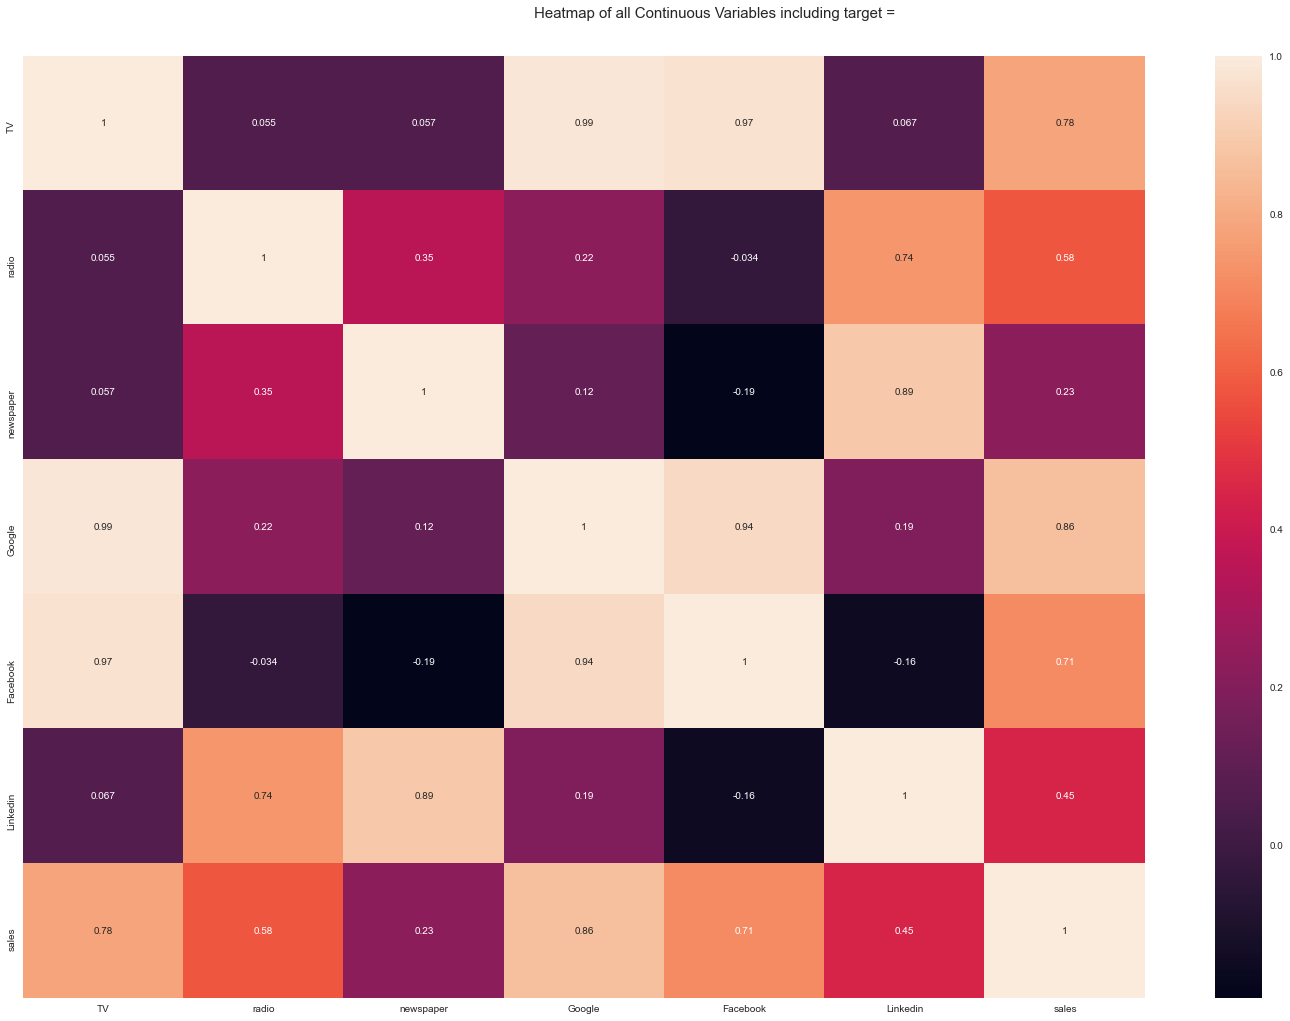

No categorical or numeric vars in data set. Hence no bar charts.
Time to run AutoViz (in seconds) = 7.156

 ###################### VISUALIZATION Completed ########################


In [3]:
import pandas as pd
from autoviz.AutoViz_Class import AutoViz_Class

#EDA using Autoviz
autoviz = AutoViz_Class().AutoViz('Marketing.csv')

In [4]:
import dtale
import pandas as pd

dtale.show(pd.read_csv("Marketing.csv"))

Here I import the libraries

In [5]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
sns.set_style('whitegrid')
%matplotlib inline

Here I read the CSV file 

In [6]:
df = pd.read_csv('Marketing.csv')

In [7]:
df.shape

(200, 7)

In [8]:
df.head()

,TV,radio,newspaper,Google,Facebook,Linkedin,sales
0,230.1,37.8,69.2,267.9,160.9,107.0,22.1
1,44.5,39.3,45.1,83.8,-0.6,84.4,10.4
2,17.2,45.9,69.3,63.1,-52.1,115.2,9.3
3,151.5,41.3,58.5,192.8,93.0,99.8,18.5
4,180.8,10.8,58.4,191.6,122.4,69.2,12.9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   Google     200 non-null    float64
 4   Facebook   200 non-null    float64
 5   Linkedin   200 non-null    float64
 6   sales      200 non-null    float64
dtypes: float64(7)
memory usage: 11.1 KB


In [10]:
df.describe()

,TV,radio,newspaper,Google,Facebook,Linkedin,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,170.306500,116.488500,53.818000,14.022500
std,85.854236,14.846809,21.778621,87.926689,87.369442,30.392927,5.217457
min,0.700000,0.000000,0.300000,10.700000,-72.500000,3.100000,1.600000
25%,74.375000,9.975000,12.750000,90.625000,42.575000,30.875000,10.375000
50%,149.750000,22.900000,25.750000,175.550000,124.450000,46.400000,12.900000
75%,218.825000,36.525000,45.100000,243.300000,183.900000,73.950000,17.400000
max,296.400000,49.600000,114.000000,332.700000,291.800000,150.600000,27.000000


Here I check for null value( Missing values)

In [11]:
df.isnull().any()

TV           False
radio        False
newspaper    False
Google       False
Facebook     False
Linkedin     False
sales        False
dtype: bool

<AxesSubplot:>

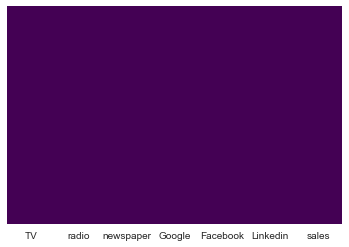

In [12]:
# no null because there are no yellow lines. 
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [14]:
df = df.fillna(method='ffill')

Visualize the data using pairplot, distplot, heatmap methods

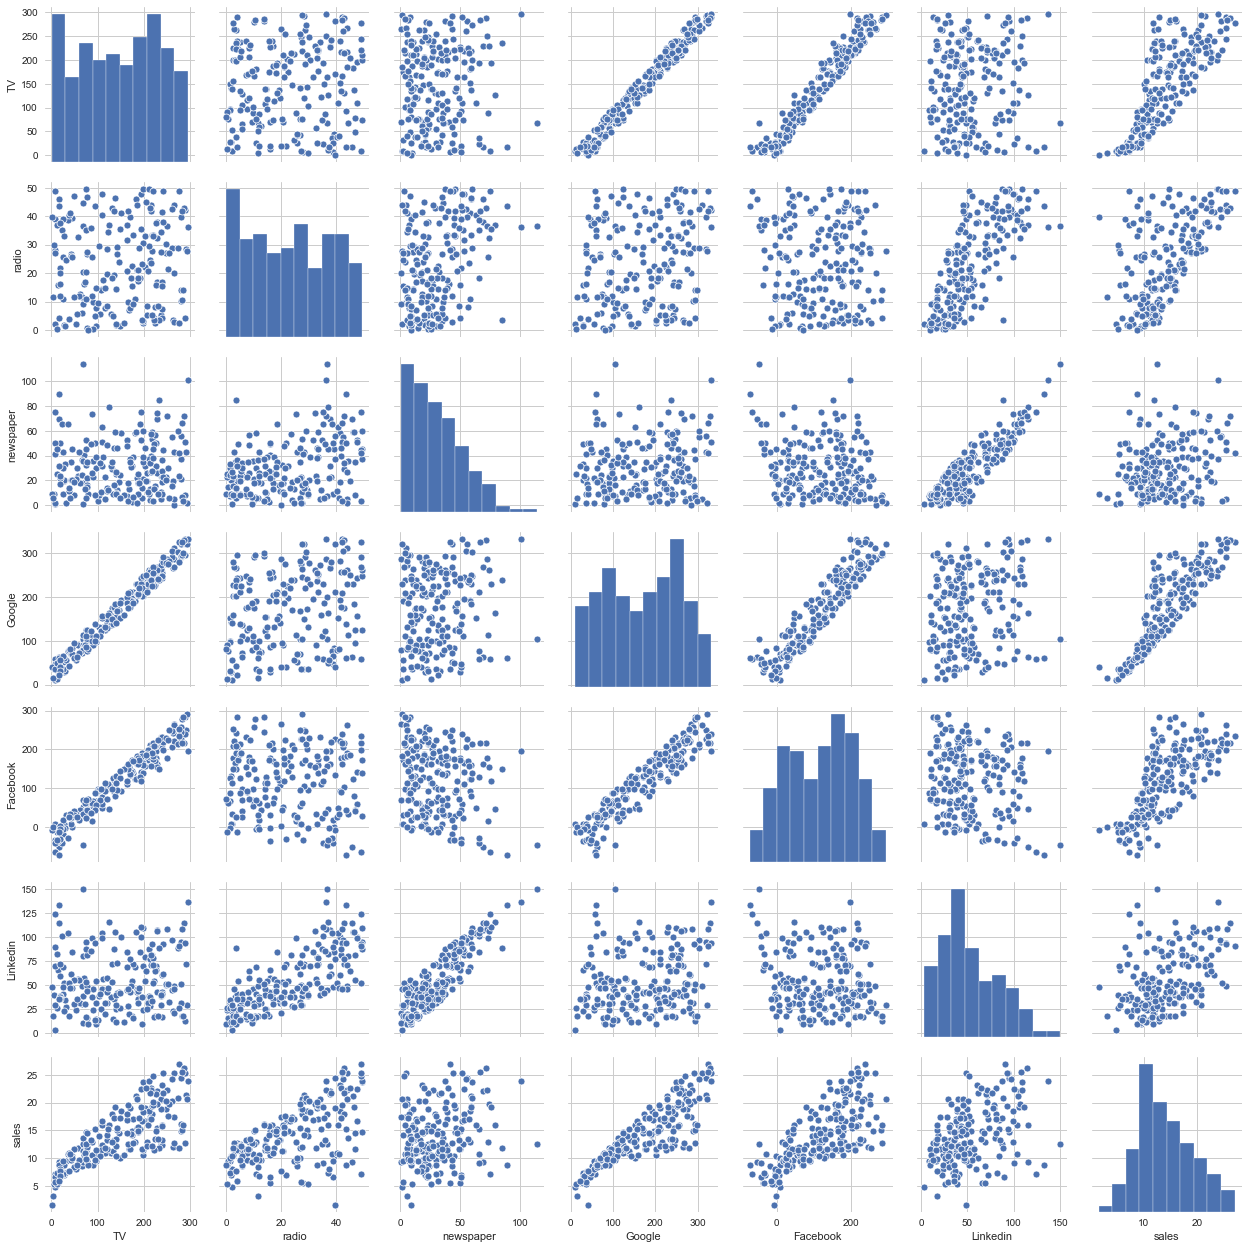

In [16]:
sns.pairplot(df)

<AxesSubplot:xlabel='sales'>

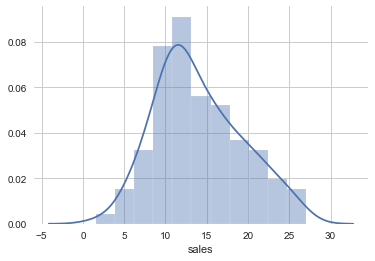

In [17]:
sns.distplot(df['sales'])

<AxesSubplot:>

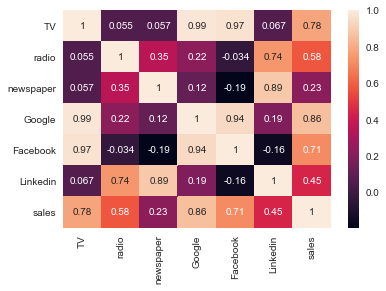

In [18]:
sns.heatmap(df.corr(),annot=True)

In [22]:
df.columns

Index(['TV', 'radio', 'newspaper', 'Google', 'Facebook', 'Linkedin', 'sales'], dtype='object')

Assign values to x, y. X has all the columns, y has only the target column which is the sales columns  

In [23]:
X = df[['TV', 'radio', 'newspaper', 'Google', 'Facebook', 'Linkedin']]
y = df['sales']

Here I split the data in to train and test data using train_test_split method 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Linear Regression

In [25]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)

In [26]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
TV,-1.656208e+12
radio,-8.255814e+11
newspaper,8.306270e+11
Google,9.769854e+11
Facebook,6.792230e+11
Linkedin,-1.514040e+11


In [27]:
print("The intercept for model is {}".format(regressor.intercept_))

The intercept for model is 3.217500000000001


In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.3763975234630823
Mean Squared Error: 4.6039026015334406
Root Mean Squared Error: 2.145670664741782


Ridge Regression

In [29]:
from sklearn.linear_model import Ridge
ridgeR = Ridge(alpha = 1) 
ridgeR.fit(X_train, y_train) 
y_pred = ridgeR.predict(X_test) 

In [30]:
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 

4.4020710094232065


In [31]:
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= X_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 

     Columns  Coefficient Estimate
0         TV             -0.027527
1      radio              0.087796
2  newspaper             -0.039368
3     Google              0.060269
4   Facebook              0.011841
5   Linkedin              0.048428


Lasso Regression

In [32]:
from sklearn.linear_model import Lasso 

In [33]:
lasso = Lasso(alpha = 1) 
lasso.fit(X_train, y_train) 
y_pred1 = lasso.predict(X_test)

In [34]:
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = X_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 
  
print(lasso_coeff) 

Mean squared error on test set 4.324006528988853
     Columns  Coefficient Estimate
0         TV              0.000000
1      radio              0.146013
2  newspaper             -0.000000
3     Google              0.044552
4   Facebook              0.000000
5   Linkedin              0.000000
Executing shutdown due to inactivity...


2021-01-27 20:31:32,697 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-01-27 20:31:49,059 - INFO     - Executing shutdown...
